In [ ]:
!pip install scikit-learn --quiet
!pip install pandas --quiet
!pip install numpy --quiet
!pip install matplotlib --quiet

In [21]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

news = fetch_20newsgroups(subset='all') # subset='all' means we want all the data ( train + test)
print(f" The news dataset has {len(news.data)} samples")
print(f" Column names are {list(news.keys())}")
print(f" The target names are {set(news.target_names)}")



 The news dataset has 18846 samples
 Column names are ['data', 'filenames', 'target_names', 'target', 'DESCR']
 The target names are {'rec.sport.hockey', 'comp.windows.x', 'sci.crypt', 'sci.med', 'comp.os.ms-windows.misc', 'talk.politics.mideast', 'rec.sport.baseball', 'rec.autos', 'comp.sys.mac.hardware', 'talk.politics.misc', 'talk.politics.guns', 'comp.sys.ibm.pc.hardware', 'soc.religion.christian', 'talk.religion.misc', 'misc.forsale', 'rec.motorcycles', 'alt.atheism', 'sci.space', 'sci.electronics', 'comp.graphics'}


In [22]:
# print a sample news
print(f" news category {news.target_names[news.target[70]]}")

print(f" {news.data[70]}")

 news category comp.sys.ibm.pc.hardware
 From: dwayne@stratsft.uucp (Dwayne Bailey)
Subject: Need help identifying Serial board
Organization: Strategic Software, Redford, Michigan
Lines: 26

I need some help with a multi port serial board of unknown origin.  I'm
hoping someone knows what this board is, or, even better, what the various
switches and jumbers are used for.

Anyway, here's  description of the card:  It is a 16-bit card, although
I noticed that none of the contacts in the 16-bit extension are connected
to anything.  It has 4 NS16550AN chips in sockets, and 4 corresponding
connecters labeled COM1 - COM4.  There is also an external female connector
with 37 pins.  There are 8 banks of 8 switches, 2 banks of 4 switches, and
7 jumpers.  I believe that I have determined, by following traces, that
SW5 and SW6 (12 switches in all) control the interrupt level for each of
the COM ports.  SW5[1-4] are for IRQ3, SW5[5-8] are for IRQ4, and SW6[1-4]
are for IRQ5.  The other switches are 

# Learnings from the Exploration

- Filenames give us the category_names of each article ( Potential feature)
- There are 18846 rows of data
- the data column has uncleaned text data which required frthur processing to be converted to a useable state
- the text lenght is negatively skewed 
- Category 16, 19, 18, has less documents compared to the rest of the categories

## Data
- Consist of 3 useable columns data, target_names, target
- target_names provides us with a unique list of topic names in the following format ```main_category.sub_category.topic```
- Note: the topic part in the target is sometime missing or not available 
- We can try to classify the documents into main_categories and maybe then narrow them down with sub and topics. 

## Potential tasks
- Text classification and Text Clustering 
Hypothesis : Based on an article's words or content can we place them into a group / topic

In [23]:
# exporing filenames and DESCR for potential use
print(f" The filenames are {news.filenames}")
print(f" The DESCR is {news.DESCR}")

 The filenames are ['/Users/anushkrishnav/scikit_learn_data/20news_home/20news-bydate-test/rec.sport.hockey/54367'
 '/Users/anushkrishnav/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60215'
 '/Users/anushkrishnav/scikit_learn_data/20news_home/20news-bydate-train/talk.politics.mideast/76120'
 ...
 '/Users/anushkrishnav/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60695'
 '/Users/anushkrishnav/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38319'
 '/Users/anushkrishnav/scikit_learn_data/20news_home/20news-bydate-test/rec.autos/103195']
 The DESCR is .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
a

In [24]:
# print descr fully

print(news.DESCR)
# save the description to a file
with open("news.txt", "w") as f:
    f.write(news.DESCR)


.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [25]:
# exploring target names
target_names = list(set(news.target_names))
main_categories = [x.split(".")[0] for x in target_names]
sub_categories = [x.split(".")[1] for x in target_names]
# while creating topics I discovered that some of the target names have only 2 parts
topics = [x.split(".")[2] for x in target_names if len(x.split(".")) > 2]
unique_categories = set(main_categories)
unique_sub_categories = set(sub_categories)
unique_topics = set(topics)
print(f" The main categories are {unique_categories}")
print(f" The sub categories are {unique_sub_categories}")
print(f" The topics are {unique_topics}")


 The main categories are {'soc', 'comp', 'misc', 'alt', 'rec', 'talk', 'sci'}
 The sub categories are {'windows', 'os', 'electronics', 'sys', 'motorcycles', 'autos', 'forsale', 'space', 'graphics', 'religion', 'atheism', 'politics', 'crypt', 'sport', 'med'}
 The topics are {'baseball', 'ibm', 'christian', 'misc', 'mideast', 'mac', 'x', 'hockey', 'ms-windows', 'guns'}


In [26]:
print(f" The number of aritcles are {len(news.data)}")
print(f" The number of main categories are {len(unique_categories)}")
print(f" The number of sub categories are {len(unique_sub_categories)}")
print(f" The number of topics are {len(unique_topics)}")
print(f" The number of unique topics are {len(target_names)}")

 The number of aritcles are 18846
 The number of main categories are 7
 The number of sub categories are 15
 The number of topics are 10
 The number of unique topics are 20


In [27]:
# creating a dataframe
prefix = "/home/codespace/scikit_learn_data/20news_home/"
df = pd.DataFrame({'text': news.data, 'category': news.target, 'filename': news.filenames})
# removing the prefix from the filename
df['filename'] = df['filename'].apply(lambda x: x.replace(prefix, "").split("/")[1])
df.head()
# filter rows with category 10
df[df['category'] == 10].head()

,text,category,filename
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,Users
7,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,Users
8,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,Users
24,From: cs902043@ariel.yorku.ca (SHAWN LUDDINGTO...,10,Users
44,From: gritter@cs.purdue.edu (Carl Gritter)\nSu...,10,Users


In [28]:
# rename filename column to category_named
df.rename(columns={'filename': 'label'}, inplace=True)

In [29]:
# describe the dataframe
df.describe()

,category
count,18846.000000
mean,9.293166
std,5.562798
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,19.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      18846 non-null  object
 1   category  18846 non-null  int64 
 2   label     18846 non-null  object
dtypes: int64(1), object(2)
memory usage: 441.8+ KB


## Class Distribution

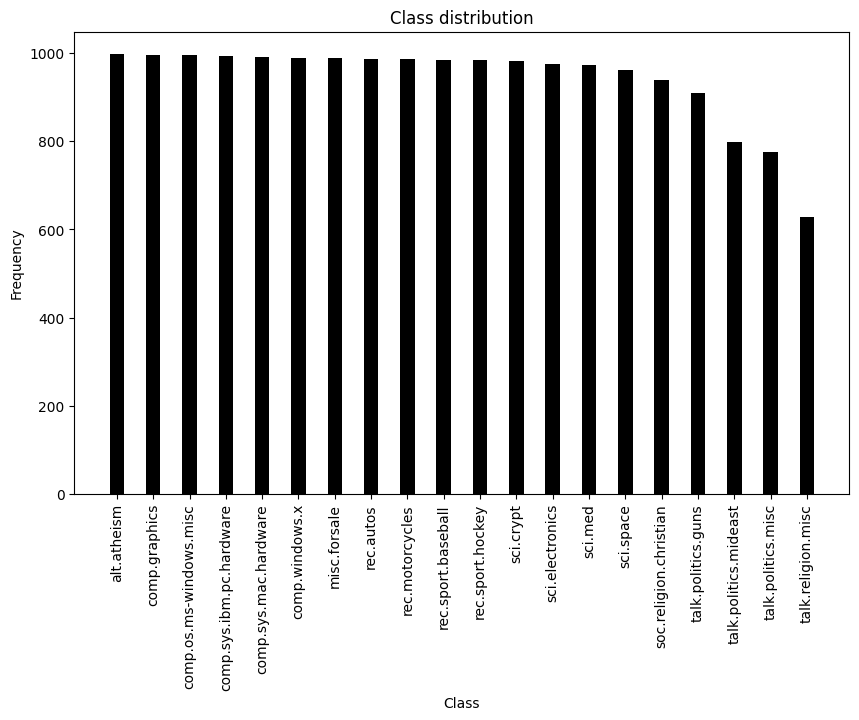

In [31]:
class_distribution = df['category'].value_counts()

# Plot the distribution, backgroun is a color code



plt.figure(figsize=(10, 6))
# use the class names as labels on the x axis
plt.bar(news.target_names, class_distribution, color='black',width=0.4)
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()



Text(0.5, 1.0, 'News groups distribution')

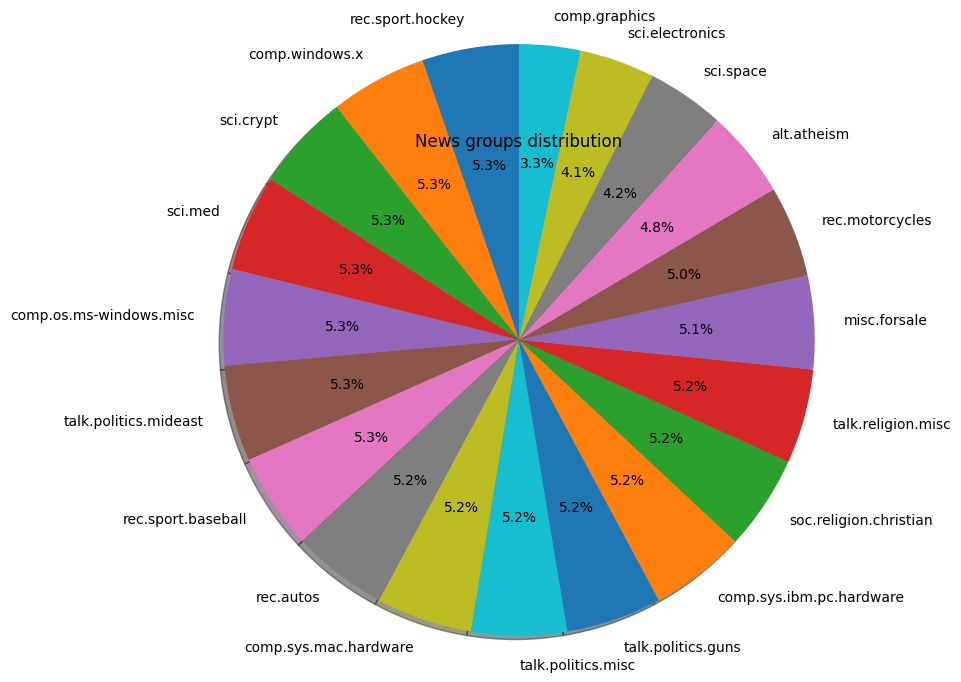

In [32]:
# class distribution on pie chart

slices = []

for key, value in class_distribution.items():
    slices.append(value)

labels = list(set(news.target_names))
   
fig , ax = plt.subplots()

# ax.pie(slices, labels = labels , autopct = '%1.1f%%', shadow = True, startangle = 90)
# bigger pie to make the autopct visible
ax.pie(slices, labels = labels , autopct = '%1.1f%%', shadow = True, startangle = 90, radius = 2)


ax.set_title("News groups distribution")

 

count     18846.000000
mean       1902.525894
std        3984.970264
min         115.000000
25%         751.000000
50%        1175.000000
75%        1874.750000
max      160616.000000
Name: text_length, dtype: float64


<Figure size 1000x600 with 0 Axes>

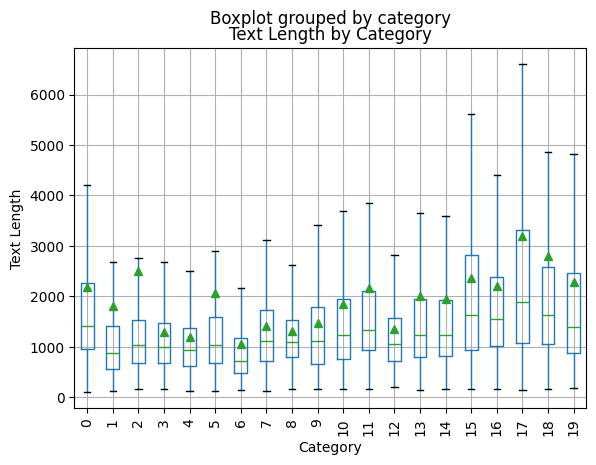

In [33]:
# Calculate the length of each document
df['text_length'] = df['text'].apply(len)

# Display statistics about text length
print(df['text_length'].describe())

# Plot a boxplot of text length for each category
plt.figure(figsize=(10, 6))
df.boxplot(column='text_length', by='category', showfliers=False, showmeans=True)
plt.title('Text Length by Category')
plt.ylabel('Text Length')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()


In [34]:
# look for duplicates
df[df.duplicated(['text'], keep=False)].sort_values('text').head(10)
print(f" The number of duplicates are {len(df[df.duplicated(['text'], keep=False)])}")
# drop duplicates
df.drop_duplicates(['text'], inplace=True)

# look for null values
df.isnull().sum()



 The number of duplicates are 0


text           0
category       0
label          0
text_length    0
dtype: int64

 The average length of text is 1902.5258940889314
 The minimum length of text is 115
 The maximum length of text is 160616


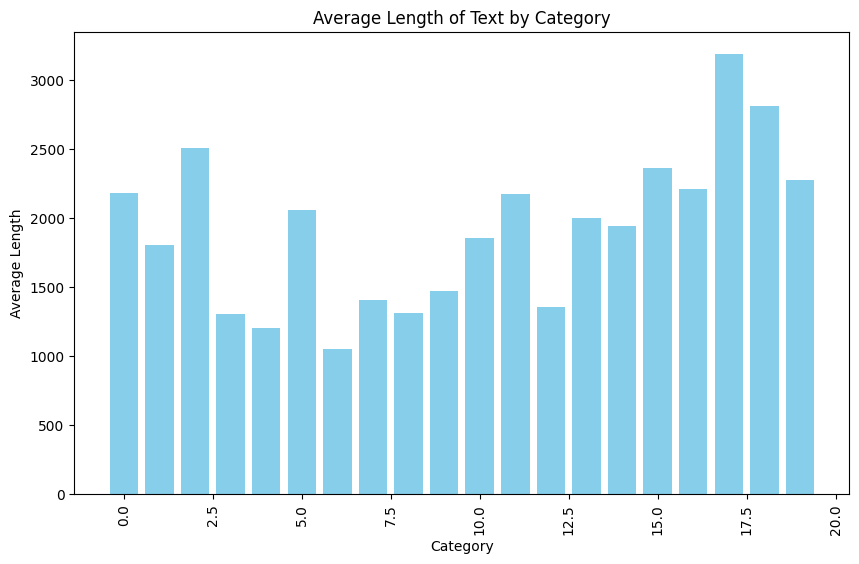

In [35]:
# New column for text length
df['text_length'] = df['text'].apply(len)

print(f" The average length of text is {df['text_length'].mean()}")
print(f" The minimum length of text is {df['text_length'].min()}")
print(f" The maximum length of text is {df['text_length'].max()}")

# Average length of text by category
avg_len = {} # Category: Average Length
for category in df['category'].unique():
    avg_len[category] = df[df['category'] == category]['text_length'].mean()

# plot the average length of text by category
plt.figure(figsize=(10, 6))
plt.bar(avg_len.keys(), avg_len.values(), color='skyblue')
plt.title('Average Length of Text by Category')
plt.xlabel('Category')
plt.ylabel('Average Length')
plt.xticks(rotation=90)
plt.show()




 The average word count is 283.6560012734798


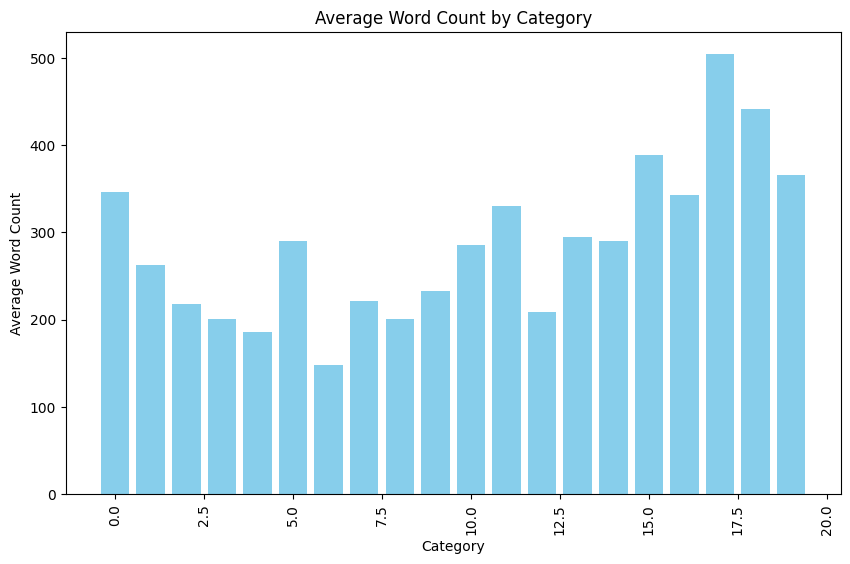

In [36]:
# average word count of text
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

print(f" The average word count is {df['word_count'].mean()}")

# average word count by category
avg_word_count = {} # Category: Average Length
for category in df['category'].unique():
    avg_word_count[category] = df[df['category'] == category]['text'].apply(lambda x: len(x.split())).mean()

# plot the average length of text by category
plt.figure(figsize=(10, 6))
plt.bar(avg_word_count.keys(), avg_word_count.values(), color='skyblue')
plt.title('Average Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Average Word Count')
plt.xticks(rotation=90)
plt.show()


<Figure size 1000x600 with 0 Axes>

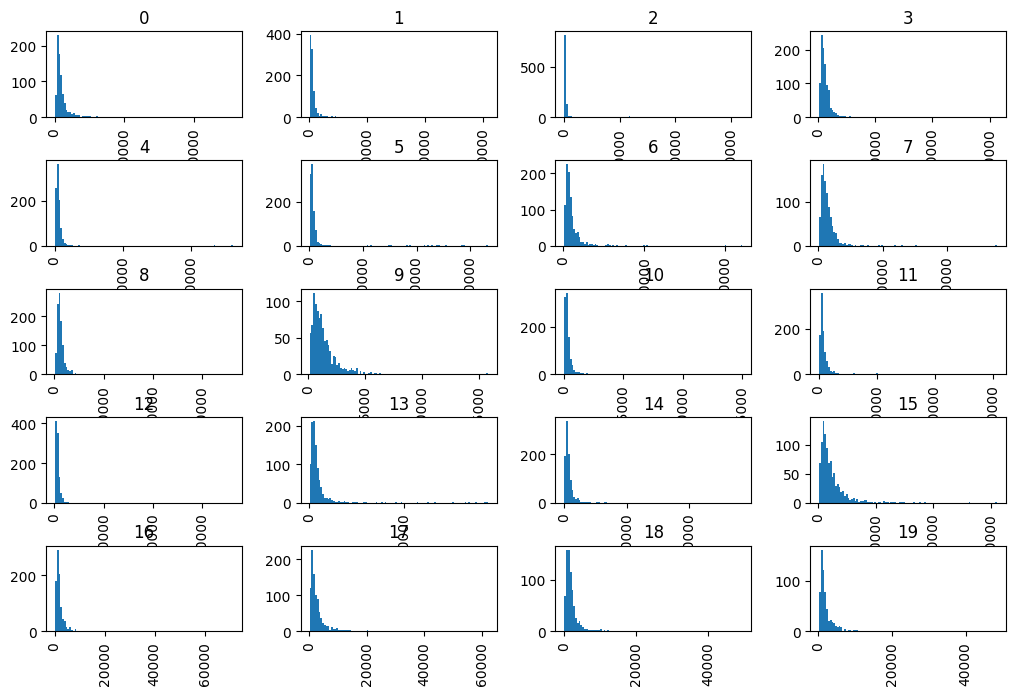

In [ ]:
# text length distribution by category
plt.figure(figsize=(10, 6))
df.hist(column='text_length', by='category', bins=10, figsize=(12, 8))
plt.show()


In [ ]:
#unigram distribution of popular words 